## 20143692_Kangkyeungseok
## Machine Learning Assignment 06
## K-means clustering on the spatial domain

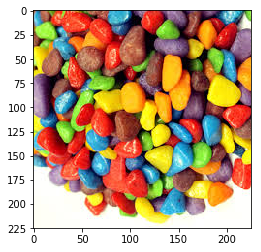

In [9]:
import PIL.Image as pilimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random

image=cv2.imread('C:\\Users\\rkdru\\Desktop\\test\\images.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [10]:
#check image size and define size_row, size_col
size_row=len(image[:,:,:])
size_col=len(image[0,:,:])

# declare x, y matrix using image size
x_matrix = np.empty((size_col, size_row), dtype=int)
y_matrix = np.empty((size_col, size_row), dtype=int)

for i in range(0, size_row):
    for j in range(0, size_col):
        x_matrix[i][j] = i
        y_matrix[i][j] = j


        
# input data normalize about [0 , 1]
def normalize(data):
    data_normalized = (data - min(data)) / (max(data) - min(data))
    return(data_normalized)

# calculate distance between x , y usung L1
def l1_distance(x, y):
    d = abs(x - y)
    s = np.sum(d)
    return(s)

# calculate distance between x , y usung L2
def l2_distance(x, y):
    d = (x - y) ** 2
    s = np.sum(d)
    return(s)


# calcuate the values of the input data in l2-norm
def norm(x):
    r = np.sqrt(x.T * x)
    return(r)

## k = 10 clustering using L2-norm

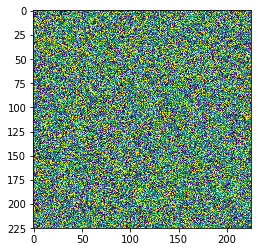

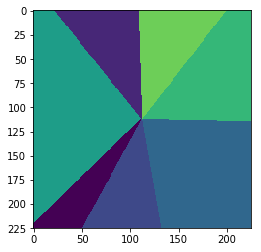

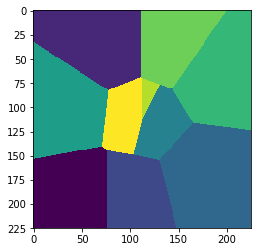

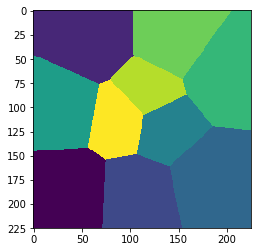

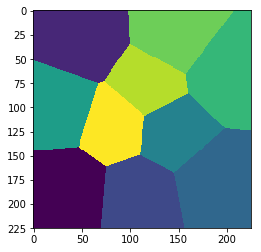

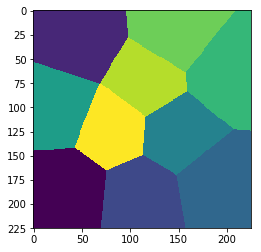

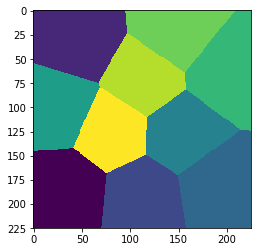

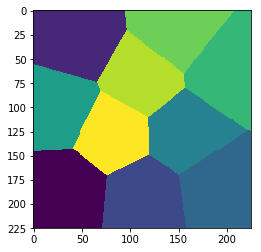

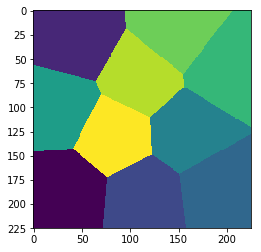

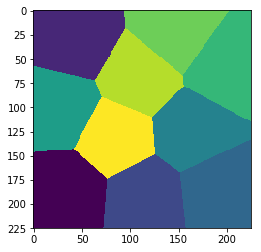

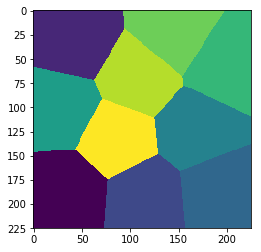

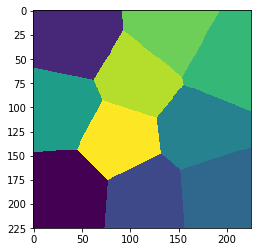

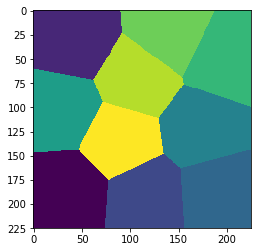

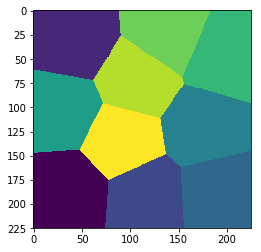

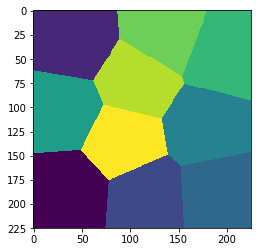

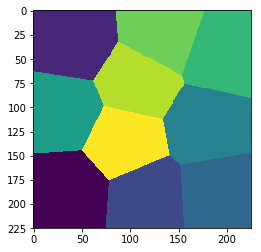

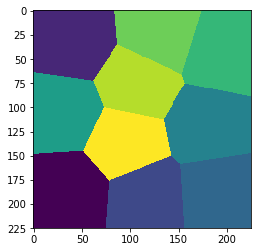

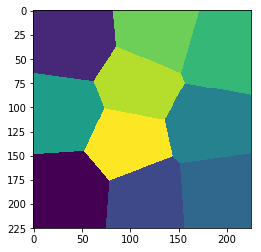

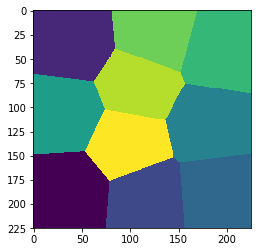

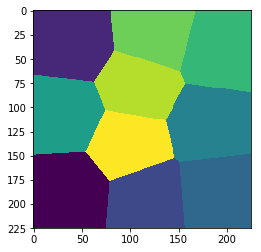

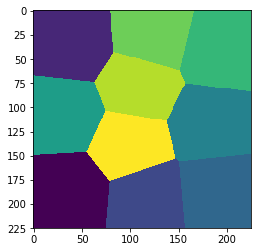

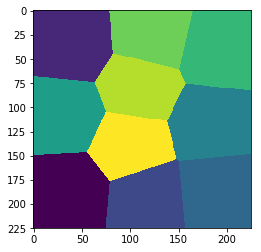

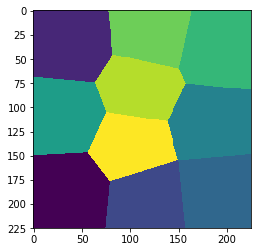

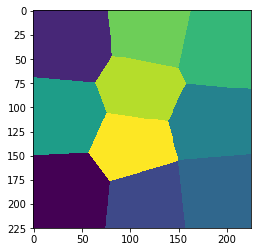

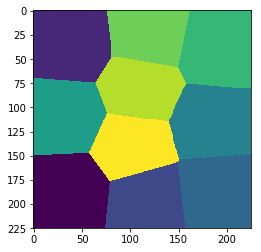

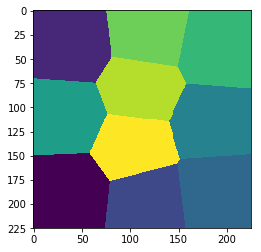

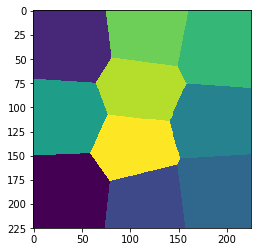

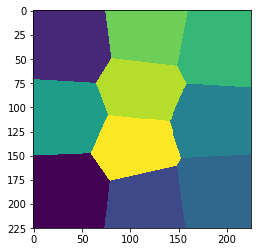

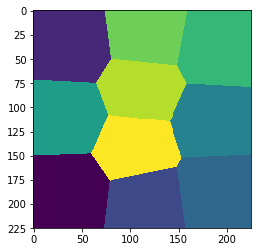

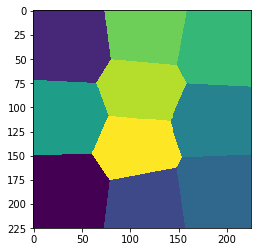

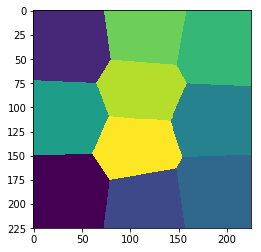

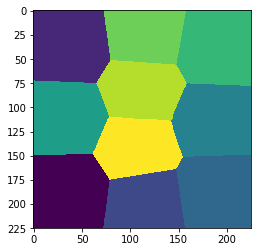

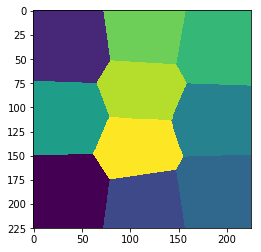

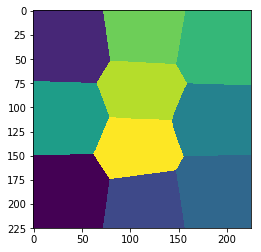

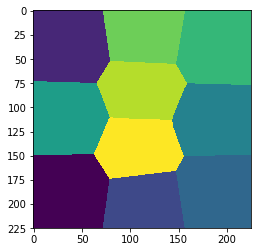

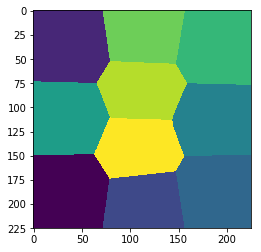

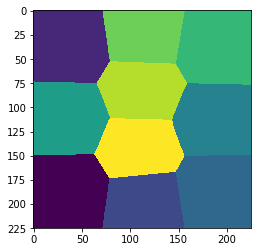

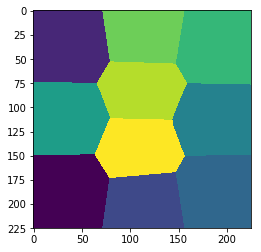

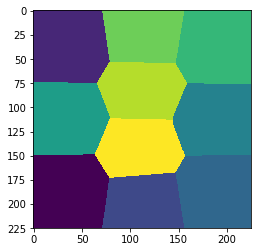

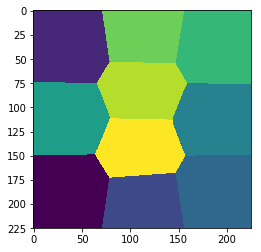

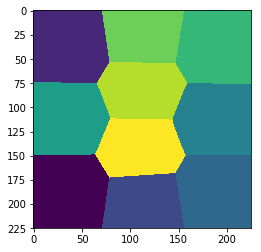

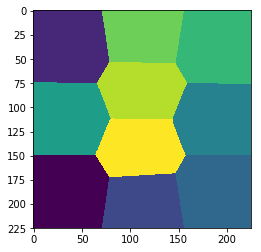

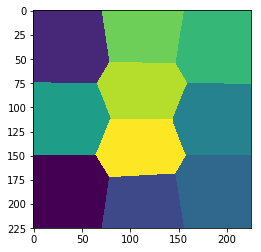

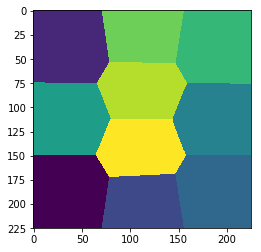

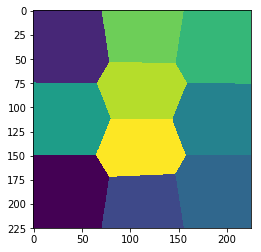

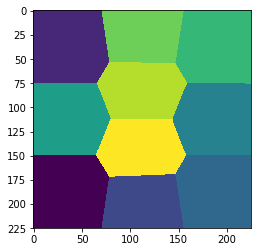

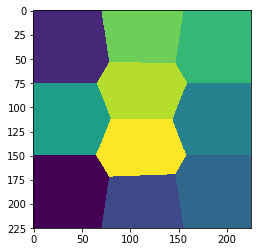

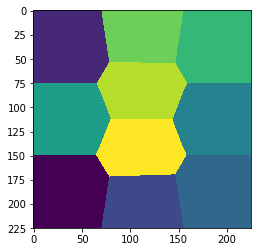

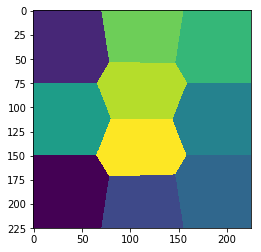

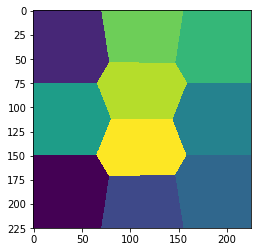

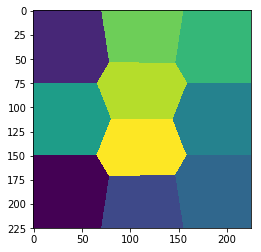

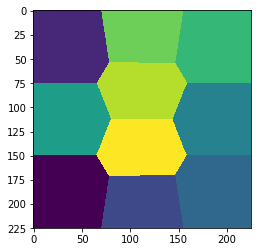

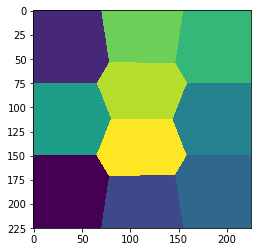

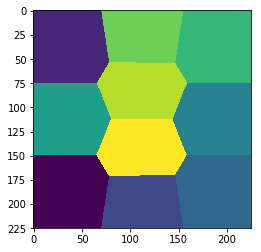

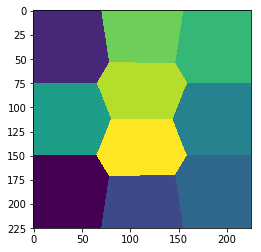

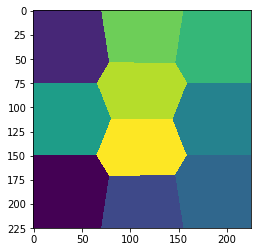

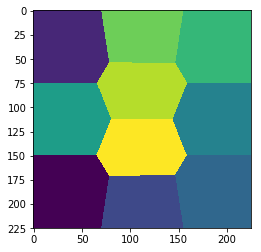

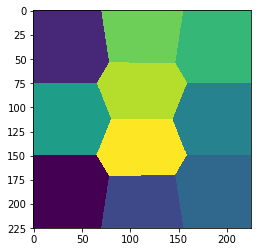

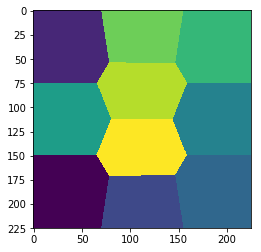

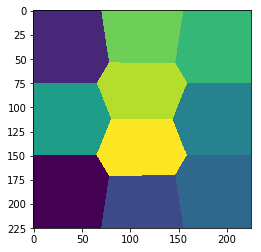

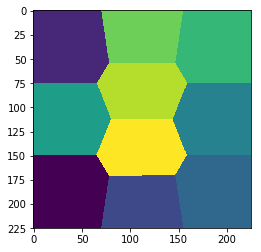

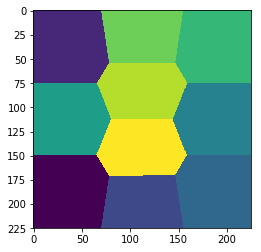

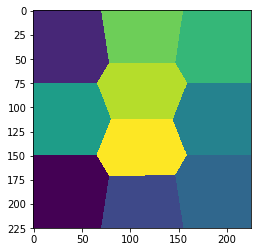

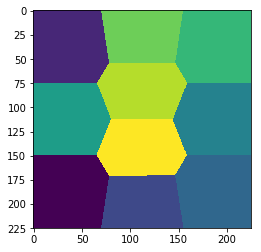

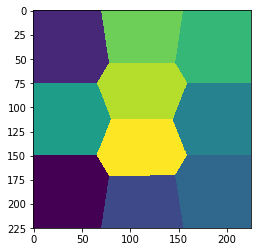

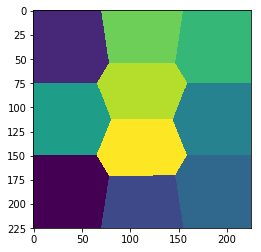

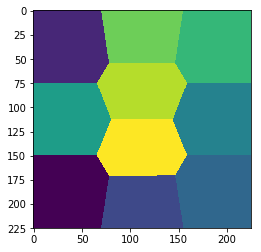

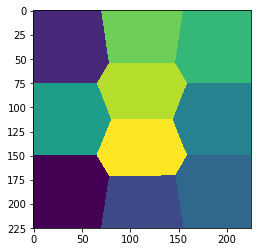

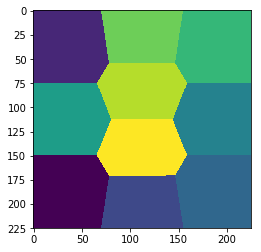

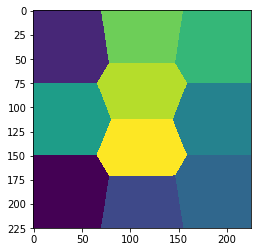

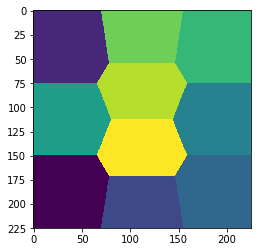

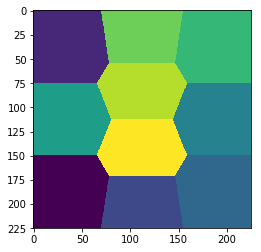

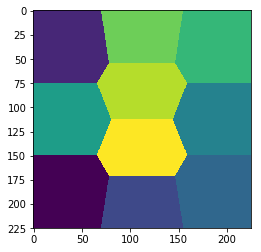

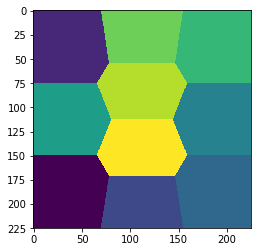

In [11]:
k = 10

x_list_centroid = np.zeros(k, dtype=float)
x_list_count    = np.zeros(k)
y_list_centroid = np.zeros(k, dtype=float)
y_list_count    = np.zeros(k)

list_label    = np.empty((size_col, size_row), dtype=int)

#calculate centroid 
for i in range(size_col):
    for j in range(size_row):
        label       = random.randint(0, k - 1)
        list_label[i][j]       = label
        x_list_centroid[label]+= x_matrix[i][j]
        y_list_centroid[label]+= y_matrix[i][j]
        x_list_count[label]      += 1
        y_list_count[label]      += 1
        
#calculate avg centroid 
for i in range(0, k):
    x_list_centroid[i] /= x_list_count[i]
    y_list_centroid[i] /= y_list_count[i]

while True:
    plt.imshow(list_label)
    plt.show()
    checkUpdate = 0
    for i in range(size_col):
        for j in range(size_row):
            label = list_label[i][j]
            min = l2_distance(x_list_centroid[label], x_matrix[i][j]) + l2_distance(y_list_centroid[label], y_matrix[i][j])
            for m in range(k):
                if m == label:
                    continue
                checkDistance = l2_distance(x_list_centroid[m], x_matrix[i][j]) + l2_distance(y_list_centroid[m], y_matrix[i][j])
                if(min > checkDistance):
                    list_label[i][j] = m
                    min = checkDistance
                    checkUpdate += 1
    if(checkUpdate == 0):
        break
    
    x_list_centroid = np.zeros(k, dtype=float)
    y_list_centroid = np.zeros(k, dtype=float)
    x_list_count = np.zeros(k)
    y_list_count = np.zeros(k)
    
    for i in range(size_col):
        for j in range(size_row):
            label = list_label[i][j]
            x_list_centroid[label] += x_matrix[i][j]
            y_list_centroid[label] += y_matrix[i][j]
            x_list_count[label]       += 1
            y_list_count[label]       += 1

    for i in range(0, k):
        x_list_centroid[i] /= x_list_count[i]
        y_list_centroid[i] /= y_list_count[i]

## k = 10 clustering using L1-norm

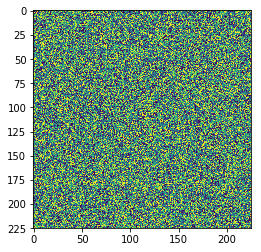

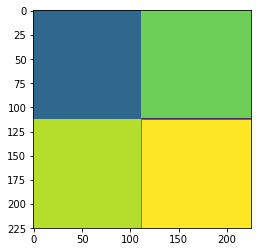

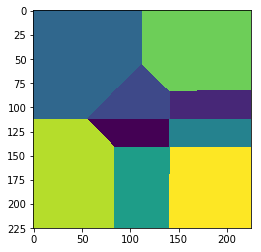

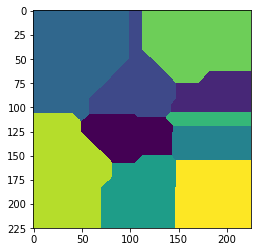

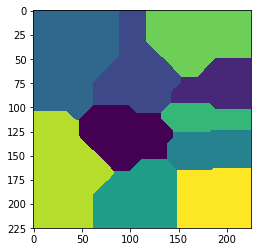

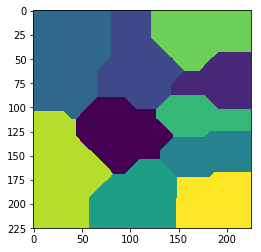

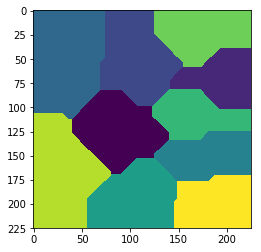

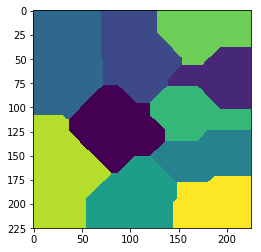

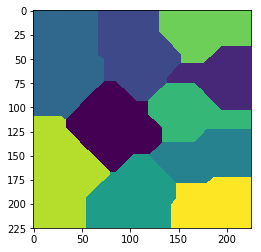

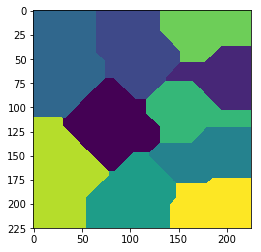

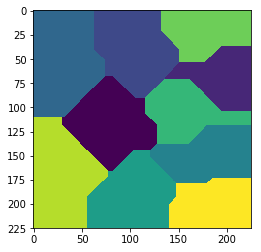

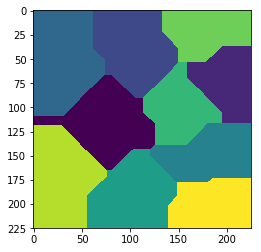

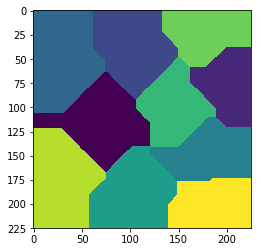

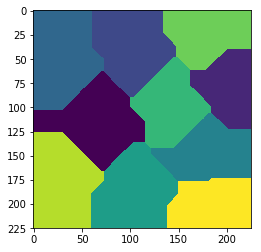

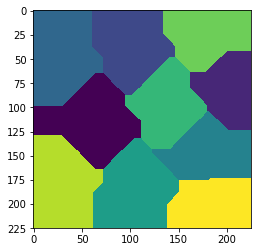

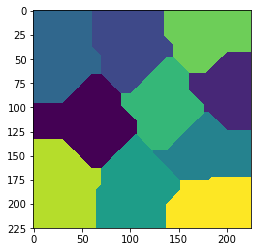

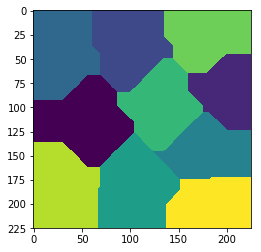

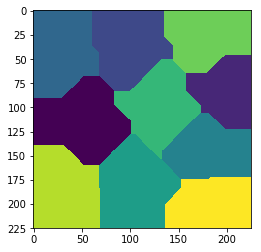

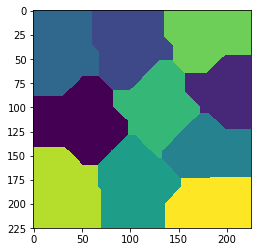

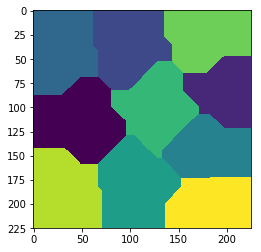

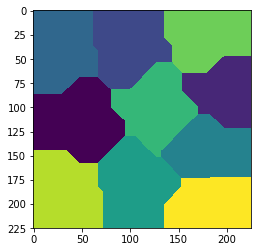

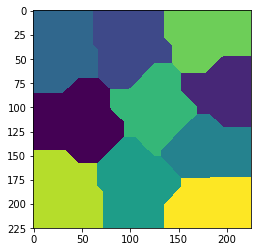

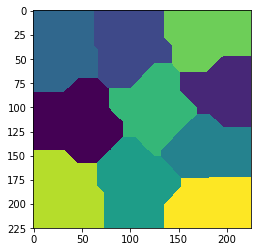

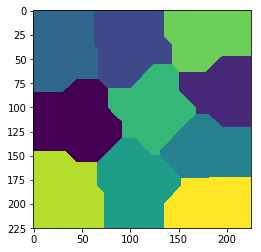

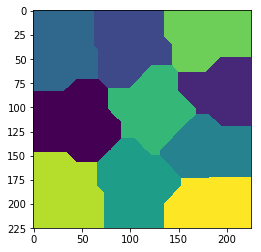

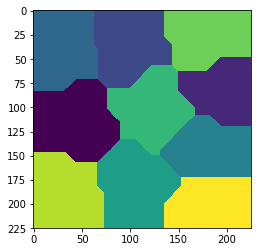

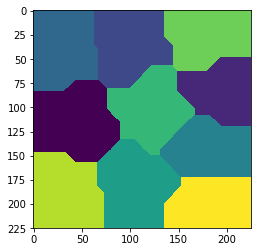

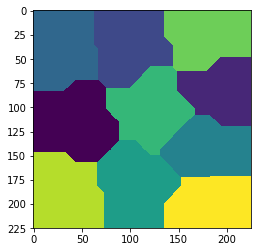

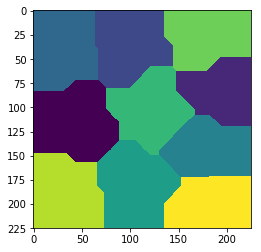

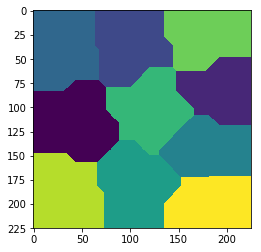

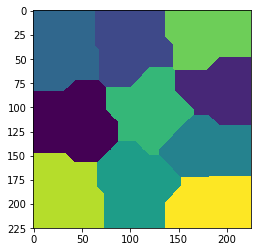

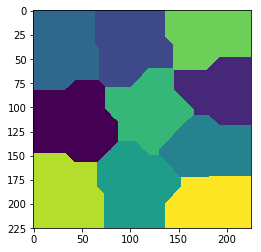

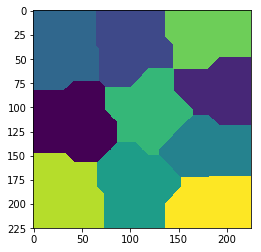

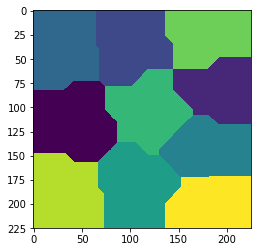

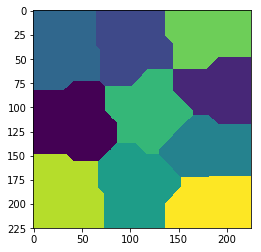

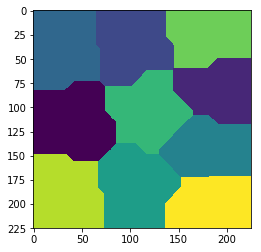

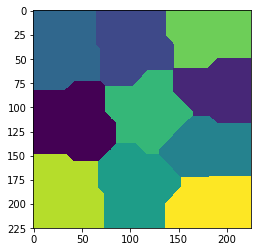

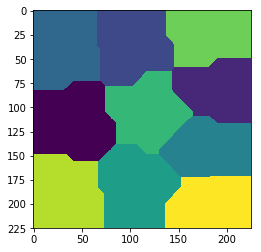

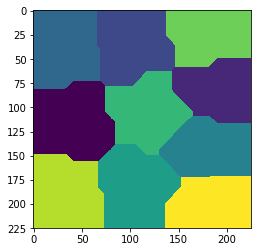

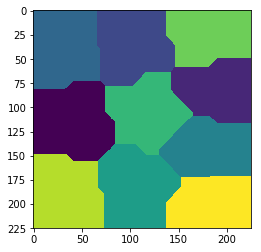

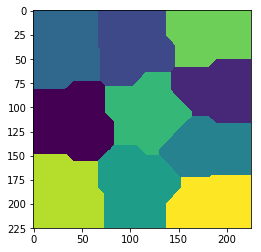

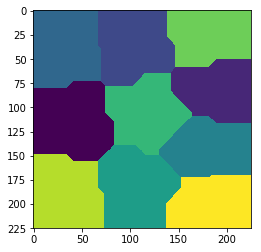

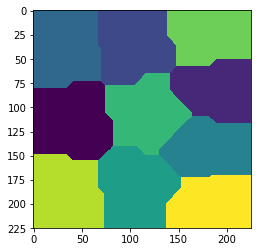

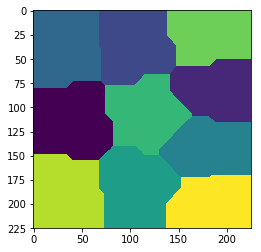

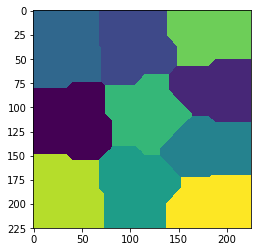

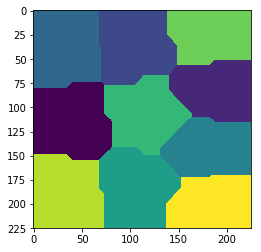

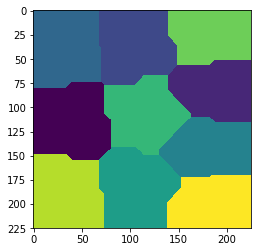

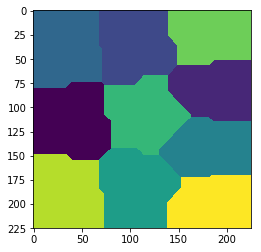

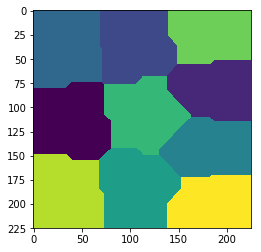

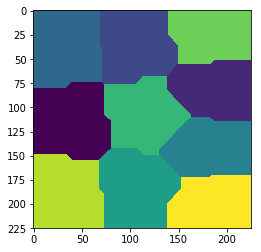

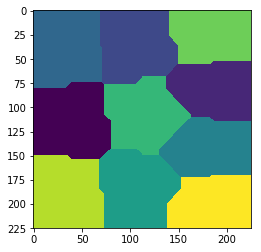

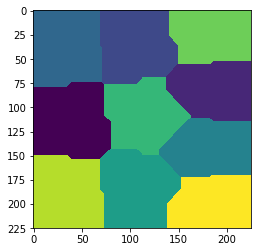

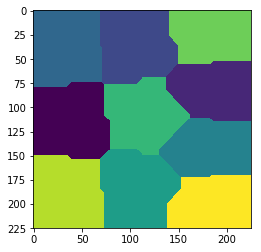

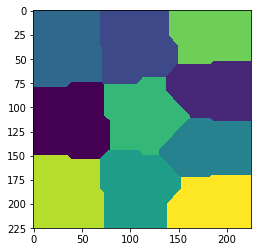

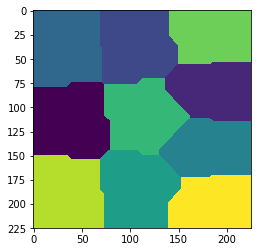

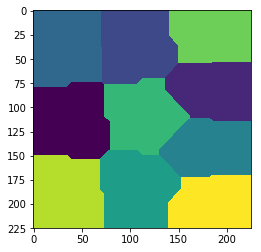

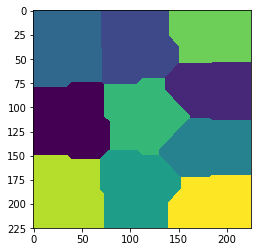

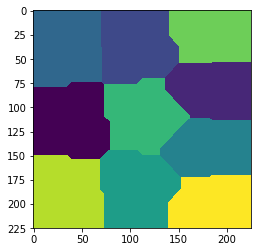

In [12]:
k = 10

x_list_centroid = np.zeros(k, dtype=float)
x_list_count    = np.zeros(k)
y_list_centroid = np.zeros(k, dtype=float)
y_list_count    = np.zeros(k)

list_label    = np.empty((size_col, size_row), dtype=int)

#calculate centroid 
for i in range(size_col):
    for j in range(size_row):
        label       = random.randint(0, k - 1)
        list_label[i][j]       = label
        x_list_centroid[label]+= x_matrix[i][j]
        y_list_centroid[label]+= y_matrix[i][j]
        x_list_count[label]      += 1
        y_list_count[label]      += 1
        
#calculate avg centroid 
for i in range(0, k):
    x_list_centroid[i] /= x_list_count[i]
    y_list_centroid[i] /= y_list_count[i]

while True:
    plt.imshow(list_label)
    plt.show()
    checkUpdate = 0
    for i in range(size_col):
        for j in range(size_row):
            label = list_label[i][j]
            min = l1_distance(x_list_centroid[label], x_matrix[i][j]) + l1_distance(y_list_centroid[label], y_matrix[i][j])
            for m in range(k):
                if m == label:
                    continue
                checkDistance = l1_distance(x_list_centroid[m], x_matrix[i][j]) + l1_distance(y_list_centroid[m], y_matrix[i][j])
                if(min > checkDistance):
                    list_label[i][j] = m
                    min = checkDistance
                    checkUpdate += 1
    if(checkUpdate == 0):
        break
    
    x_list_centroid = np.zeros(k, dtype=float)
    y_list_centroid = np.zeros(k, dtype=float)
    x_list_count = np.zeros(k)
    y_list_count = np.zeros(k)
    
    for i in range(size_col):
        for j in range(size_row):
            label = list_label[i][j]
            x_list_centroid[label] += x_matrix[i][j]
            y_list_centroid[label] += y_matrix[i][j]
            x_list_count[label]       += 1
            y_list_count[label]       += 1

    for i in range(0, k):
        x_list_centroid[i] /= x_list_count[i]
        y_list_centroid[i] /= y_list_count[i]